# Who survived the Titanic?

I will not be applyng any machine learning algorithms to this, as those do not tend to be very explainable.  So to answer the question, we will be looking at basic percentages derived from questions of the form "How many people with quality A survived when looking at a specific subset of people?"

First we will establish the some relations among all the Titanic passengers we have data for.  Then, we will divide them into sections and look at the odds of surviving.  The main questions we are looking to answer are as follows:
1) Among first class passengers, what are the odds of surviving? Second class? Third class?  
2) For passengers aged 18 and under, what are the odds of survival? 18-40? 40 and over?  
3) What are the odds for a man surviving? For a woman?  

These are not to be taken as a complete analysis, only as a reasonable exploration for a self-learning adventure that does not take several weeks or more to answer one question.  

So onto the first steps: Loading up the appropriate libraries and the dataset.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv("TitanicSurvivalData.csv")

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


After the preliminaries we see that only the 'Age' and 'Cabin' categories have missing values.  Missing 'Cabin' entries are of no concern to us, and the 'Age' category has enough non-null entries that I will not devise a methodology for replacing null values.  Of note, the 'Age' category contains estimated values for age of the form 'xx.5'.  I will leave these as is.  

While we will not make full use of these statistics, we will first establish some baselines for the entire passenger population, as well as the entire survivor population.  Then we will provide answers to the three questions posed at the beginning.

In [7]:
print('Baseline survival rate:', 
      str(round((len(titanic_df[titanic_df['Survived'] == 1]) / len(titanic_df)) * 100,2)) + '%')

Baseline survival rate: 38.38%


In [8]:
survivors = titanic_df[titanic_df['Survived']==1]

firstclass = titanic_df[titanic_df['Pclass'] == 1]
secondclass = titanic_df[titanic_df['Pclass'] == 2]
thirdclass = titanic_df[titanic_df['Pclass'] == 3]

youngsters = titanic_df[titanic_df['Age'] <= 18]
oldsters = titanic_df[titanic_df['Age'] >= 40]
middlesters = titanic_df[titanic_df['Age'] < 40].merge(titanic_df[titanic_df['Age'] > 18], how='inner')

males = titanic_df[titanic_df['Sex'] == 'male']
females = titanic_df[titanic_df['Sex'] == 'female']

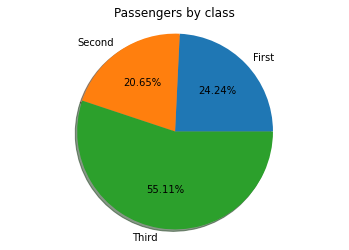

In [13]:
# Passengers class

labels = 'First', 'Second', 'Third'
values = [len(firstclass), len(secondclass), len(thirdclass)]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct = '%1.2f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Passengers by class")

plt.show()

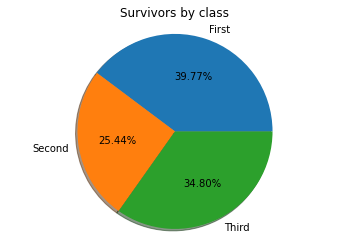

In [16]:
# Survivors class

labels = 'First', 'Second', 'Third'
values = [len(firstclass[firstclass['Survived']==1]), 
          len(secondclass[secondclass['Survived']==1]), 
          len(thirdclass[thirdclass['Survived']==1])]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct = '%1.2f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Survivors by class")

plt.show()

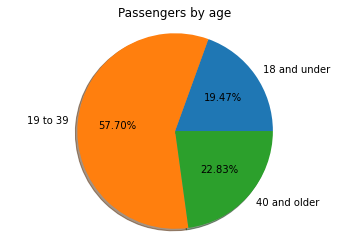

In [11]:
# Passengers Age

labels = '18 and under', '19 to 39', '40 and older'
values = [len(youngsters), len(middlesters), len(oldsters)]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct = '%1.2f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Passengers by age")

plt.show()

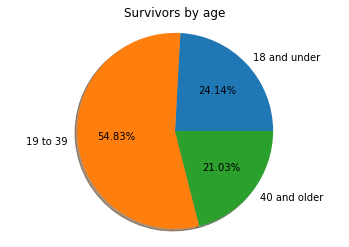

In [15]:
# Survivors Age

labels = '18 and under', '19 to 39', '40 and older'
values = [len(youngsters[youngsters['Survived']==1]), 
          len(middlesters[middlesters['Survived']==1]), 
          len(oldsters[oldsters['Survived']==1])]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct = '%1.2f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Survivors by age")

plt.show()

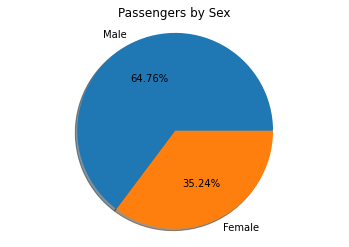

In [17]:
# Passengers sex

labels = 'Male', 'Female'
values = [len(males), len(females)]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct = '%1.2f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Passengers by Sex")

plt.show()

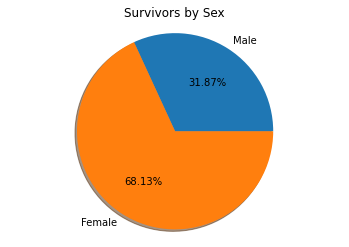

In [18]:
# Survivors sex

labels = 'Male', 'Female'
values = [len(males[males['Survived']==1]), 
          len(females[females['Survived']==1])]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct = '%1.2f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Survivors by Sex")

plt.show()

In [19]:
print('Odds of a first class passenger surviving:', 
      str(round((len(firstclass[firstclass['Survived'] == 1]) / len(firstclass))*100,2)) + '%')

print('Odds of a second class passenger surviving:', 
      str(round((len(secondclass[secondclass['Survived'] == 1]) / len(secondclass))*100,2)) + '%')

print('Odds of a third class passenger surviving:', 
      str(round((len(thirdclass[thirdclass['Survived'] == 1]) / len(thirdclass))*100,2)) + '%')

Odds of a first class passenger surviving: 62.96%
Odds of a second class passenger surviving: 47.28%
Odds of a third class passenger surviving: 24.24%


In [20]:
print('Odds of a passenger aged 18 and younger surviving:', 
      str(round((len(youngsters[youngsters['Survived']==1]) / len(youngsters))*100,2))+'%')
print('Odds of a passenger aged 19 to 39 surviving:', 
      str(round((len(middlesters[middlesters['Survived']==1]) / len(middlesters))*100,2))+'%')
print('Odds of a passenger aged 40 and over surviving:', 
      str(round((len(oldsters[oldsters['Survived']==1]) / len(oldsters))*100,2))+'%')

Odds of a passenger aged 18 and younger surviving: 50.36%
Odds of a passenger aged 19 to 39 surviving: 38.59%
Odds of a passenger aged 40 and over surviving: 37.42%


In [22]:
print('Odds of a male passenger surviving:', 
      str(round((len(males[males['Survived']==1]) / len(males))*100,2))+'%')
print('Odds of a female passenger surviving:', 
      str(round((len(females[females['Survived']==1]) / len(females))*100,2))+'%')

Odds of a male passenger surviving: 18.89%
Odds of a female passenger surviving: 74.2%


## Conclusion

There you have it.  Some basic survival rates for a few socio-economic factors of passengers.  Doubtless more sophisticated statistical analysis tools exist for looking at how correlated some of these factors are with each other.  

Combining the 'Cabin' information with information regarding layout of the ship might be useful for looking at how much time it took for the Titanic to sink (people in cabins further from the lifeboats would take longer to get to them, and thus seem less likely to survive).

Another interesting point of investigation could be looking at where passengers boarded and how that correlates with some of the socio-economic factors considered here.